<a href="https://colab.research.google.com/github/LQMinh528/AI/blob/main/AI_Midterm_report_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

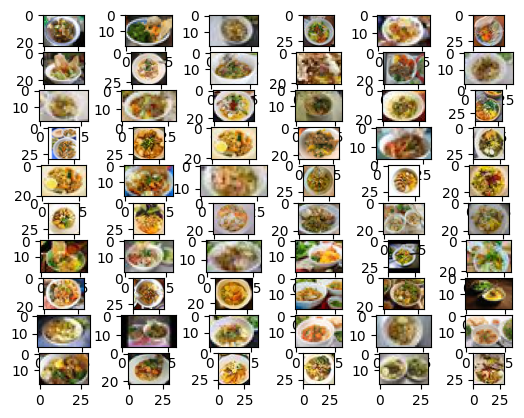

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Food/'

for i in range(60):
  plt.subplot(10,6,i+1)
  filename1 = folder + 'miquang ('+ str(i+1)+').jpg'
  img1 = plt.imread(filename1)
  plt.imshow(img1)
plt.show()

In [ ]:
from os import listdir 
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/Food/'
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('banhbeo '):
    output = 1 
  if file.startswith('banhbotloc '):
    output = 2
  if file.startswith('banhcanh '):
    output = 3
  if file.startswith('banhmi '):
    output = 4
  if file.startswith('banhxeo '):
    output = 5
  if file.startswith('bunbohue '):
    output = 6
  if file.startswith('comtam '):
    output = 7
  if file.startswith('hutieu '):
    output = 8
  if file.startswith('miquang '):
    output = 9
  if file.startswith('pho '):
    output = 10
  img = load_img(folder + file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/food_photos.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/food_labels.npy',labels)

(600, 30, 40, 3) (600,)


In [ ]:
import numpy as np
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/food_photos.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/food_labels.npy')
print(x_train.shape)
print(y_train.shape)

(600, 30, 40, 3)
(600,)


In [ ]:
x_train = x_train.astype('float32')/255


In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

y_train = to_categorical(y_train,600)
model = Sequential()

# tich chap 32 lan
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,40,3),padding='same'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# tich chap 64 lan
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# tich chap 128 lan
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(600,activation='softmax'))


from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train, batch_size=3,epochs=30,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 20, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

1/1 [==============================] - 0s 122ms/step


'bánh xèo'

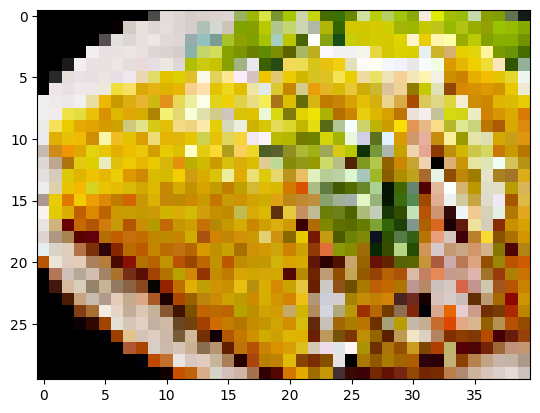

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'bánh bèo',2:'bánh bột lọc', 
       3:'bánh canh', 4:'bánh mì',
       5:'bánh xèo', 6:'bún bò huế',
       7:'cơm tấm', 8:'hủ tiếu', 9:'mì quảng', 10:'phở'} 
img = load_img("troi-mua-thu-lam-banh-xeo-kieu-mien-bac-gion-ngon-it-dau-mo-202005201034115966.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 133ms/step


'bánh mì'

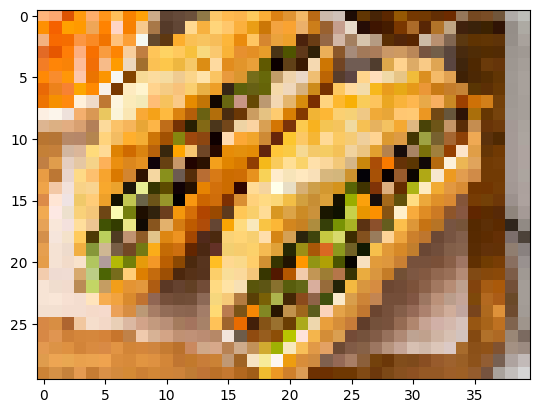

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'bánh bèo',2:'bánh bột lọc', 
       3:'bánh canh', 4:'bánh mì',
       5:'bánh xèo', 6:'bún bò huế',
       7:'cơm tấm', 8:'hủ tiếu', 9:'mì quảng', 10:'phở'} 
img = load_img("huong-dan-3-cach-lam-banh-mi-bo-thom-ngon-de-lam-cho-bua-sang-du-chat-202201041019538628.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 35ms/step


'cơm tấm'

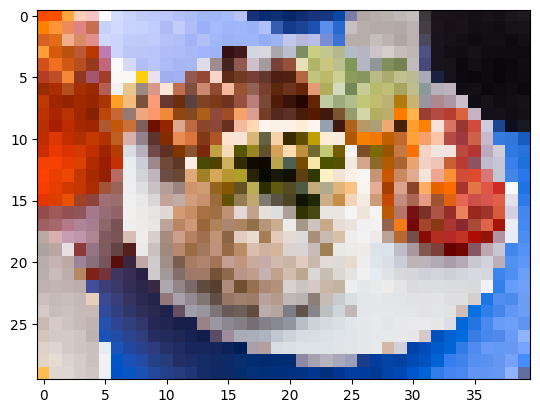

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'bánh bèo',2:'bánh bột lọc', 
       3:'bánh canh', 4:'bánh mì',
       5:'bánh xèo', 6:'bún bò huế',
       7:'cơm tấm', 8:'hủ tiếu', 9:'mì quảng', 10:'phở'} 
img = load_img("Cơm_Tấm,_Da_Nang,_Vietnam.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 17ms/step


'bánh bột lọc'

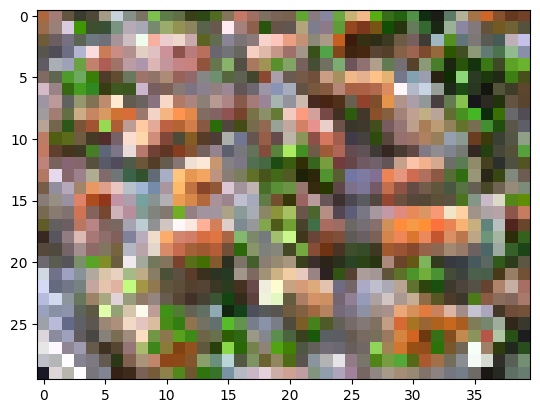

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'bánh bèo',2:'bánh bột lọc', 
       3:'bánh canh', 4:'bánh mì',
       5:'bánh xèo', 6:'bún bò huế',
       7:'cơm tấm', 8:'hủ tiếu', 9:'mì quảng', 10:'phở'} 
img = load_img("banh-bot-loc.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 20ms/step


'bánh canh'

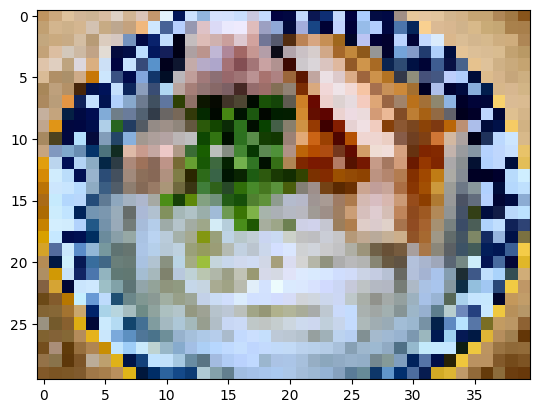

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'bánh bèo',2:'bánh bột lọc', 
       3:'bánh canh', 4:'bánh mì',
       5:'bánh xèo', 6:'bún bò huế',
       7:'cơm tấm', 8:'hủ tiếu', 9:'mì quảng', 10:'phở'} 
img = load_img("sợi-banh-canh-lam-từ-cơm-nguội-va-bột-nang-recipe-main-photo.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 21ms/step


'bánh bèo'

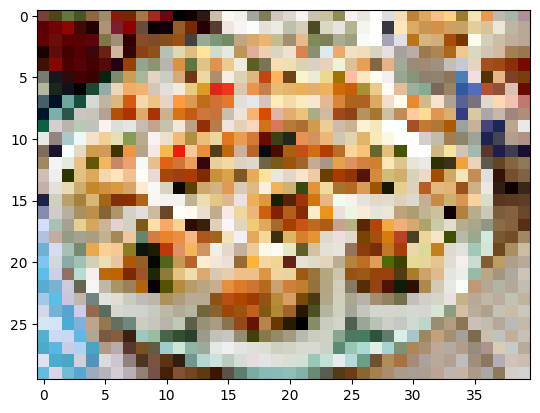

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'bánh bèo',2:'bánh bột lọc', 
       3:'bánh canh', 4:'bánh mì',
       5:'bánh xèo', 6:'bún bò huế',
       7:'cơm tấm', 8:'hủ tiếu', 9:'mì quảng', 10:'phở'} 
img = load_img("an-banh-beo-co-beo-khong-1.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 25ms/step


'bún bò huế'

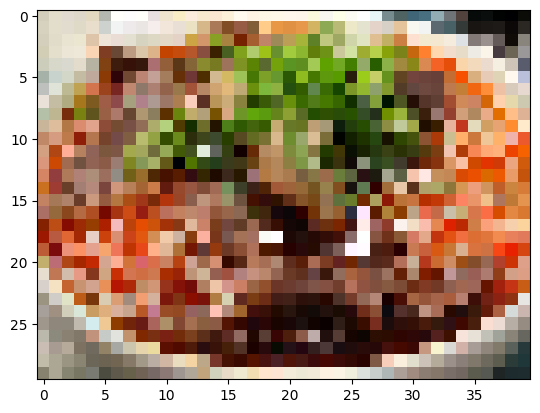

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'bánh bèo',2:'bánh bột lọc', 
       3:'bánh canh', 4:'bánh mì',
       5:'bánh xèo', 6:'bún bò huế',
       7:'cơm tấm', 8:'hủ tiếu', 9:'mì quảng', 10:'phở'} 
img = load_img("download.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 19ms/step


'phở'

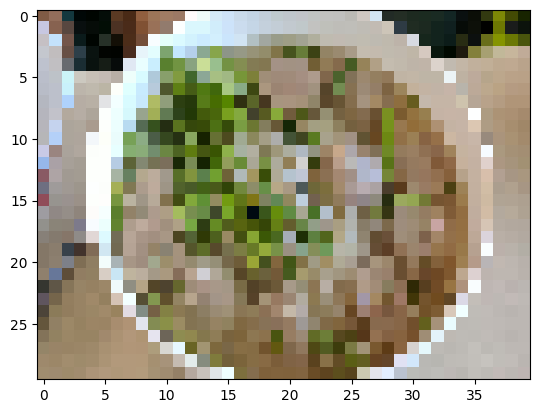

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'bánh bèo',2:'bánh bột lọc', 
       3:'bánh canh', 4:'bánh mì',
       5:'bánh xèo', 6:'bún bò huế',
       7:'cơm tấm', 8:'hủ tiếu', 9:'mì quảng', 10:'phở'} 
img = load_img("cach-nau-hu-tieu-bo-vien-ngon-202109291655171547.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]